In [1]:
import matplotlib.pyplot as plt
import numpy as np
C0=40e+3
D=5e-3
B=5
L1=4
L2=0.89
T=10
delta_x=0.05
delta_t=0.1
lambda_Rn=2.1e-06

In [3]:
# Diem M: x=L2+B
xM=int((L2+B)/delta_x)
xN=int((L1+B)/delta_x)
tN=int(T/delta_t)

alpha=D*delta_t/delta_x**2
beta=(1-2*D*delta_t/delta_x**2-lambda_Rn*delta_t)

[xM,xN,tN]

[117, 180, 100]

In [4]:
x=np.linspace(0,L1+B,xN)
t=np.linspace(0,T,tN)
Cb=np.zeros((tN,xN))
Cb[:,0]=C0


In [5]:
for j in range(0,tN-1):
    for i in range(1,xM-1):
        Cb[j,i]=(Cb[j-1,i+1]  + Cb[j-1,i-1])*alpha  + Cb[j-1,i]*beta
    
#  Tai diem xM    
Cb[:,xM]=Cb[:,xM-1]
# Tai diem xM -> xM
for j in range(1,tN-1):
    for i in range(xM+1,xN-1):
        Cb[j,i]=Cb[j-1,xN-1]
        


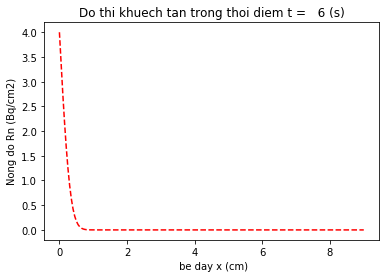

In [14]:
t=6 #s
time=int(t/delta_t)
x_plot = x
# y_plot = np.linspace(0,C0,xN)
y_plot=Cb[time,:]/1e+4
# Plot
plt.plot(x_plot, y_plot, '--', color='red');
plt.title('Do thi khuech tan trong thoi diem t =  {0:2d} (s)'.format(t))
plt.xlabel(' be day x (cm)')
plt.ylabel('Nong do Rn (Bq/cm2)')
plt.show()


  CFL condition: dt = (0.01) <= (0.0125) = dx / c


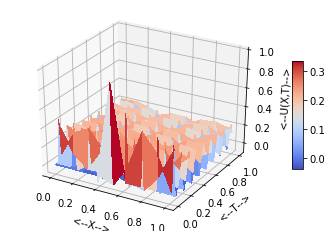

In [19]:
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
#
nx=xN
nt=tN
c=10
#
#  Set some constants.
#
dx = 1.0 / ( nx - 1 )
x = np.linspace ( 0.0, 1.0, nx )
dt = 1.0 / nt
c1 = 0.5 *   c * dt / dx
c2 = 0.5 * ( c * dt / dx ) ** 2

print ( '  CFL condition: dt = (%g) <= (%g) = dx / c' % ( dt, dx / c ) )
#
#  Set some arrays.
#
u = np.zeros ( nx )
unew = np.zeros ( nx )
X = np.zeros ( [ nx, nt + 1 ] )
Y = np.zeros ( [ nx, nt + 1 ] )
Z = np.zeros ( [ nx, nt + 1 ] )
#
#  Compute the solution from times 0/NT ... NT/NT
#
for j in range ( 0, nt + 1 ):
    t = float ( j ) / float ( nt )
    if ( j == 0 ):
        for i in range ( 0, nx ):
            if ( 0.4 <= x[i] and x[i] <= 0.6 ):
                unew[i] = ( 10.0 * x[i] - 4.0 ) ** 2 * ( 6.0 - 10.0 * x[i] ) ** 2
    else:
        unew[0] = u[0] - c1 * ( u[1] - u[nx-1] ) + c2 * ( u[1] - 2.0 * u[0] + u[nx-1] )
        for i in range ( 1, nx - 1 ):
            unew[i] = u[i] - c1 * ( u[i+1] - u[i-1] ) + c2 * ( u[i+1] - 2.0 * u[i] + u[i-1] )
            unew[nx-1] = u[nx-1] - c1 * ( u[0] - u[nx-2] ) + c2 * ( u[0] - 2.0 * u[nx-1] + u[nx-2] )
    for i in range ( 0, nx ): 
        u[i] = unew[i]
        X[i,j] = x[i]
        Y[i,j] = t
        Z[i,j] = u[i]
#
#  Make a plot.
#  These commands will fail on an older version of Python.
#
fig = plt.figure ( )
ax = fig.gca ( projection = '3d' )
surf = ax.plot_surface ( X, Y, Z, cmap = cm.coolwarm, \
linewidth = 0, antialiased = False )
ax.set_xlabel ( '<--X-->' )
ax.set_ylabel ( '<--T-->' )
ax.set_zlabel ( '<--U(X,T)-->' )
fig.colorbar ( surf, shrink = 0.5, aspect = 10 )
# plt.savefig ( 'fd1d_advection_lax_wendroff.png' )
plt.show ( )



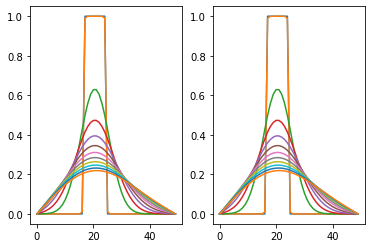

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

T0             = np.zeros(50, dtype=float)
T0[17:25]      = 1.

T1             = T0.copy()  # method 1  np.roll()
T2             = T0.copy()  # method 2  convolve()

do_me          = np.ones_like(T0, dtype=bool)
do_me[[0, -1]] = False    #  keep the boundaries of your bounding box fixed

a              = 0.01

hold_1         = [T0.copy()]
for i in range(10001):
    Ttemp      = T1 + a*(np.roll(T1, +1) + np.roll(T1, -1) - 2*T1)
    T1[do_me]  = Ttemp[do_me]
    if not i%1000:
        hold_1.append(T1.copy())

hold_2         = [T0.copy()]
kernel         = np.array([a, (1 - 2.*a), a])

for i in range(10001):
    Ttemp      = convolve(T2, kernel)
    T2[do_me]  = Ttemp[do_me]
    if not i%1000:
        hold_2.append(T2.copy())

if True:
    plt.figure()
    plt.subplot(1, 2, 1)
    for thing in hold_1:
        plt.plot(thing)

    plt.subplot(1, 2, 2)
    for thing in hold_2:
        plt.plot(thing)

    plt.show()